In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv"

data = pd.read_csv(url)

In [0]:
data.shape

(200, 5)

In [0]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

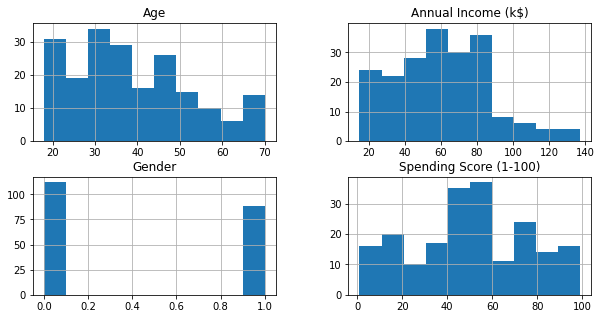

In [0]:
data1 = data.drop(['CustomerID'], axis = 1)
data1['Gender'] = pd.get_dummies(data1['Gender'], drop_first = True)

data1.hist(figsize=(10,5))
plt.show()

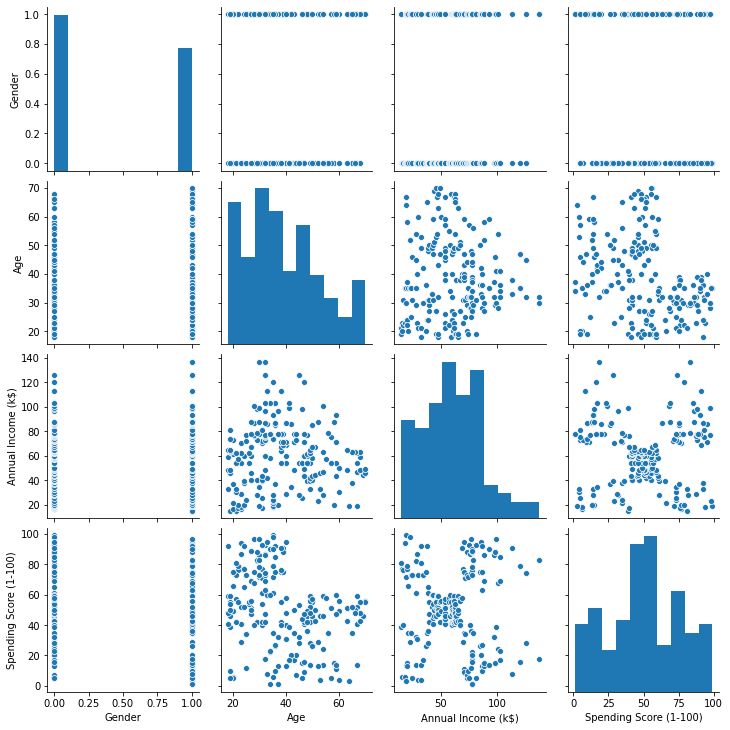

In [0]:
sns.pairplot(data1)

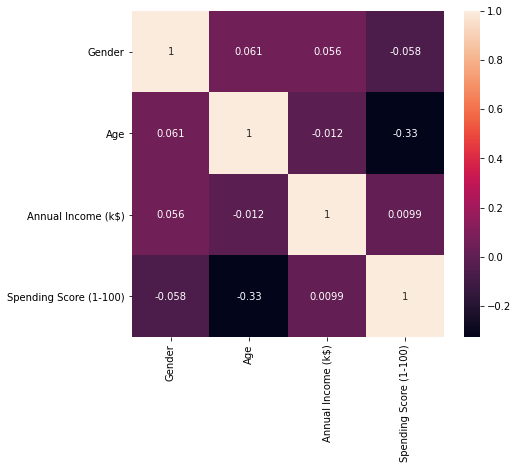

In [0]:
plt.figure(figsize = (7,6))
coerr = data1.corr()
sns.heatmap(coerr, annot = True)
plt.show()

In [0]:
hier = sch.linkage(data1, method='ward')

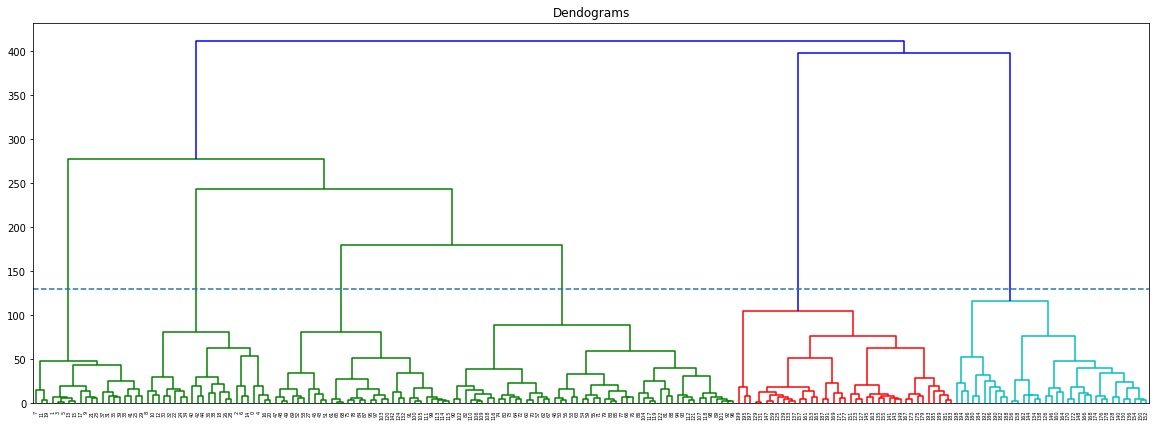

In [0]:
plt.figure(figsize=(20, 7))
dendrogram = sch.dendrogram(hier)
plt.title("Dendograms")
plt.axhline(linestyle='--', y=130) 
plt.show()

In [0]:
# creating instance of our model
agglo_clus = AgglomerativeClustering(n_clusters=6, affinity="euclidean", 
                                     linkage="ward")

In [0]:
# fitting the initialized model
agglo_clus.fit(data1)

# getting the labels of the model
labels = agglo_clus.labels_

# inspecting labels of top 10 data points
labels[:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3])

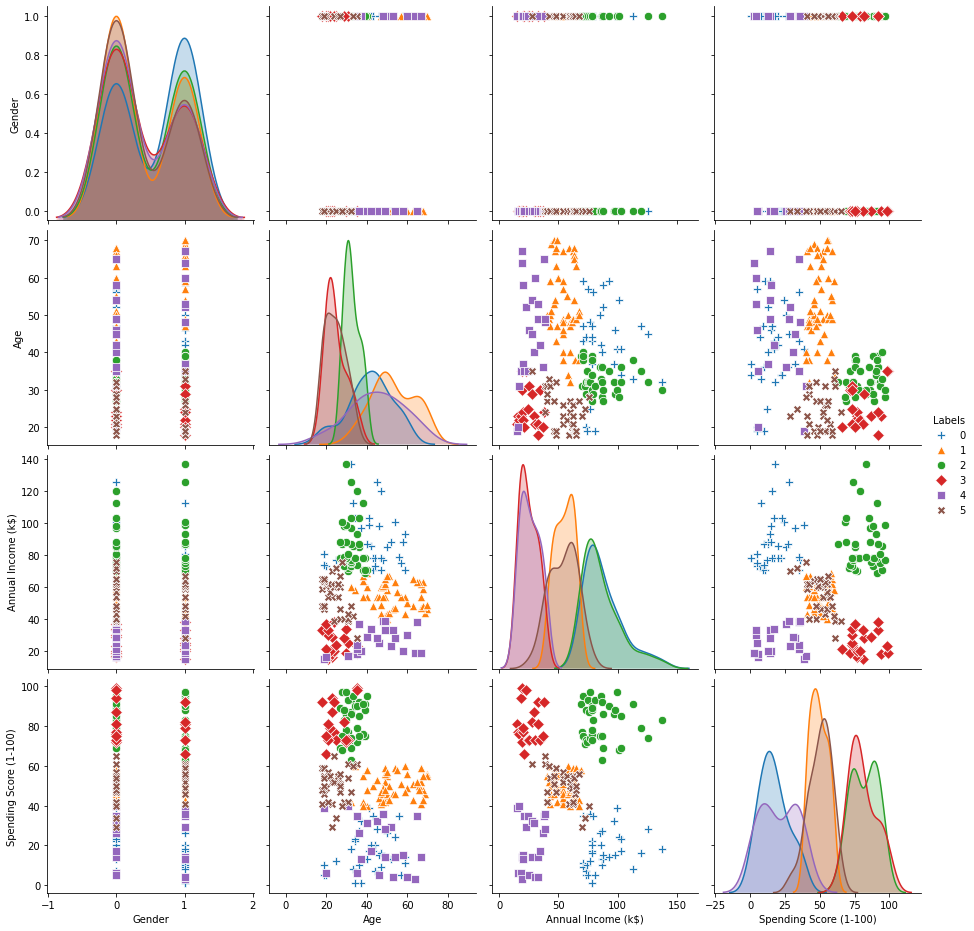

In [0]:
data1['Labels'] = labels
sns.pairplot(data1, hue="Labels", markers = ['P', '^', 'o', 'D', 's','X'], height=3.2, aspect=1, plot_kws={"s": 70})
plt.show()



>Cluster | Annual Income | Spending Score | Age
>--- | --- | --- | ---
>0 | High | Low | Younger and older
>1 | Medium | Medium | Older
>2 | High | High | Younger
>3 | Low | High | Younger
>4 | Low | Low | Younger and older
>5 | Medium | Medium | Younger

* Note: Cluster0 and Cluster5 can be targated for high revenue